# Stock Analysis

__Problem Definition:__  Due to the complexity and dependency on multiple market factors, it is very difficult to predict the dynamic Stock Market performance. But the explosion of market data and market news from multiple sources and the advancement in machine learning (ML) show a great promise to effectively predict its performance. To prove the promise, this study is to predict and validate the returns from 5 stocks (any 5 of your choice).   

__Answer:__ Understanding the inner workings of stock market by just looking at only 5 stocks and no other side information is not possible:

- If this would have been possible, plenty of people would have figured that out throughout the past centuries (two centuries since NYSE has been founded). And figuring out that correlation would mean the disruption of the correlation. 

- We don't have access to any market news information and all we have is the reflection of the news on stocks prices. Therefore, we can't draw causal relations between causes and effects between what has happened in the market.

- We are limited to only 5 stocks. So the choice of which stocks is also important. I picked the stocks for the companies that I am most familiar with and seem to be on the right track:
  - FB (Facebook)
  - GOOG (Alphabet)
  - BIDU (Baidu) 
  - APPL (Apple)
  - NVDA (Nvidia)
 
 This is a highly biased sample of the companies. Generally it is recommended that you have a diverse portfolio so that the volatility in your basket is reduced. Unfortunately I am not familiar with companies in other fields such as finance, pharmeceutical, energy, education, etc. Given my very limited knowledge of the stock market I would rather not place bets based on my gut feelings.

All difficulties aside, let's look into the data and see what's in there.

In [1]:
# imports and constants
from pandas import Series
from matplotlib import pyplot as plt



## Obtaining the Data
To obtain the data for the aforementioned stock symbols, I went to Yahoo Finance for each of the companies suh as below and downloaded the data with maximum time range as _.csv_. 
- https://finance.yahoo.com/quote/NVDA/history?p=NVDA

### Data Cleaning
I noticed that the data is not conclusive and there are missing dates/values etc. For example for APPL the data for 1981-08-10 was set to null. For the sake of this excercise I used the values for previous day. Smarter approaches can be taken to interpolate missing data given enough time.

Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Adj Close', u'Volume'], dtype='object')


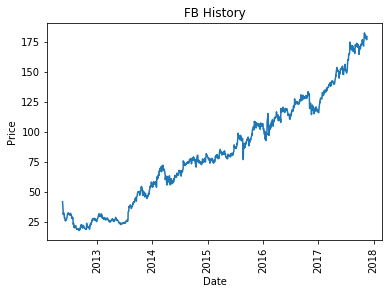

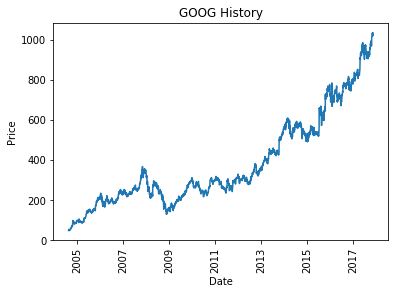

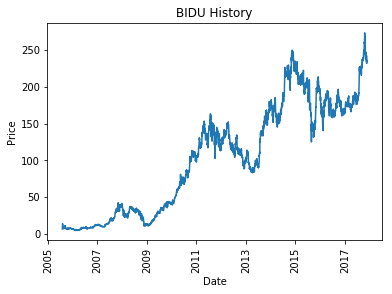

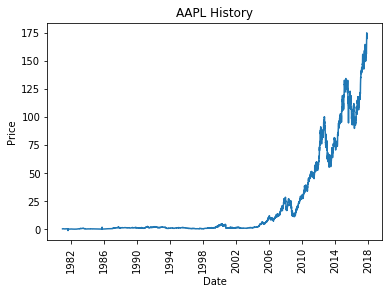

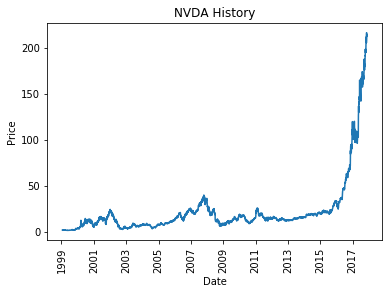

In [60]:
from pandas import read_csv
import pandas as pd

def loadAsDataFrame(stock_symbol):  
    data_frame = read_csv('stock_daily_data/' + stock_symbol + '.csv', header=0, parse_dates=[0])#, index_col=0, squeeze=False)
    # print(type(df))
    # print(df.head())
    return data_frame

#series.between_time(pd.to_datetime('2012/05/18'),pd.to_datetime('2012/05/23'))



FB_DataFrame = loadAsDataFrame('FB')
GOOG_DataFrame = loadAsDataFrame('GOOG')
BIDU_DataFrame = loadAsDataFrame('BIDU')
AAPL_DataFrame = loadAsDataFrame('AAPL')
NVDA_DataFrame = loadAsDataFrame('NVDA')

print(FB_DataFrame.columns)

def plotDataFrame(data_frame, title):
    plt.plot(data_frame['Date'], data_frame['Open'])
    plt.xticks(rotation='vertical')
    plt.title(title + ' History')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

plotDataFrame(FB_DataFrame, 'FB')
plotDataFrame(GOOG_DataFrame, 'GOOG')
plotDataFrame(BIDU_DataFrame, 'BIDU')
plotDataFrame(AAPL_DataFrame, 'AAPL')
plotDataFrame(NVDA_DataFrame, 'NVDA')

# Question 1
Are there patterns that will explain noise, normal, and unusual market conditions? Can you apply any unsupervised ML techniques to support this?

__Answer:__ _market condition_ has been utilized as a very vague term, given that it has been specifically categorized as {Noise, Normal, Unusual}. 

I share my assumption and proceed as such. Please correct me if I am wrong.
- _Noise:_ stock value going up or down without any strong backing from either quarterly reports, news or other similar stocks
- _Normal:_ stock value having a similar trend to other stock symbols that are in the same domain. For example oil prices go up in the world, energy stocks show similar reflection and similarly as oil prices go down. I call this normal behavior.
- _Unsual:_ I assume this happens when a stock symbol is facing a scandal (e.g. a pharmeceutical company losing a drug test), or surprisingly high/low returns on quarterly reports, mergers, a new war begun, tax break, etc. Events that can have dramatic impact on stock's value and are based on real world scenarios.

Given the above assumptions and that we are talking about "market condition" as a general term: Our market consists of 5 stock symbols (FB, AAPL, GOOG, BIDU, NVDA). So 

To have a better observation of the performance of these stocks in similar time range we look into '2013-01-01' to '2017-11-19'.

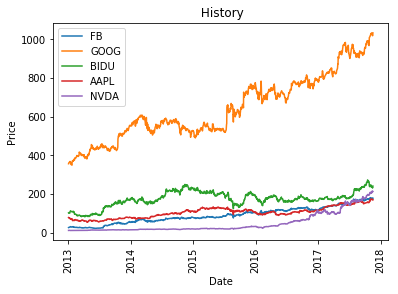

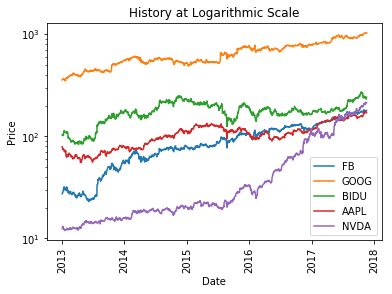

In [91]:
def getMasked(data_frame):
    start_date = '2013-01-01'
    end_date = '2017-11-19'
    mask = ((data_frame['Date'] > start_date) & (data_frame['Date'] <= end_date))
    #print(mask)
    return data_frame[mask]

syncedFB = getMasked(FBDataFrame)
syncedGOOG = getMasked(GOOGDataFrame)
syncedBIDU = getMasked(BIDU_DataFrame)
syncedAAPL = getMasked(AAPL_DataFrame)
syncedNVDA = getMasked(NVDA_DataFrame)

# print(syncedFB)

fig, ax = plt.subplots()
fbPlot,  = plt.plot(syncedFB['Date'], syncedFB['Open'], label='FB')
googPlot,  = plt.plot(syncedGOOG['Date'], syncedGOOG['Open'], label='GOOG')
biduPlot,  = plt.plot(syncedBIDU['Date'], syncedBIDU['Open'], label='BIDU')
aaplPlot,  = plt.plot(syncedAAPL['Date'], syncedAAPL['Open'], label='AAPL')
nvdaPlot, = plt.plot(syncedNVDA['Date'], syncedNVDA['Open'], label='NVDA')

plt.xticks(rotation='vertical')
plt.title(' History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(handles=[fbPlot, googPlot, biduPlot, aaplPlot, nvdaPlot])
plt.show()

# logarithmic
fig, ax = plt.subplots()
fbPlot,  = plt.plot(syncedFB['Date'], syncedFB['Open'], label='FB')
googPlot,  = plt.plot(syncedGOOG['Date'], syncedGOOG['Open'], label='GOOG')
biduPlot,  = plt.plot(syncedBIDU['Date'], syncedBIDU['Open'], label='BIDU')
aaplPlot,  = plt.plot(syncedAAPL['Date'], syncedAAPL['Open'], label='AAPL')
nvdaPlot, = plt.plot(syncedNVDA['Date'], syncedNVDA['Open'], label='NVDA')

ax.set_yscale('log')
plt.xticks(rotation='vertical')
plt.title('History at Logarithmic Scale')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(handles=[fbPlot, googPlot, biduPlot, aaplPlot, nvdaPlot])
plt.show()


Here we see the general growth rate of the market, where the majority of the stocks have a relatively similar slope. In an _usupervised_ manner, we can determine the linear regression slope of each stock and set a threshold to determine normal market growth rate behavior. This threshold can help us distinguish normal versus not-normal growth.

Here we notice that NVDA's growth rate is much more than the others. Using simple linear algebra one can easily identify such cases and build majority voting cases to decide what is a __normal__ market performance (FB, GOOG, BIDU, AAPL) and what is __Unusual__. Cases where a stock goes up and down close to its expected slope can be considered as __noise__.

Sometimes as we can see in BIDU, AAPL and FB that almost in the middle of 2015-2016 there is a sharp dip in all of these stocks. This is an _unusual_ case and needs to be studied further as what caused this syncronous behavior.

One thing to keep in mind that various stock symbols release their quarterly report at various timings, so we should also consider that offset to have a better sync of out metrics.

In [ ]:


2.      Can you identify and explain the possible market factors by using statistical and machine learning techniques?

3.      Is it possible to develop‎ a predictive model to predict the returns from the stocks? If possible,

a.       What are the possible features and algorithms you would consider (please provide reasoning)?

b.      Can you develop/test/validate an end to end predictive model?

c.       Can you explain the predictions?

4.      What are the lessons you have learned from this study?